In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from hict.api.ContactMatrixFacet import ContactMatrixFacet
from pathlib import Path
from matrix_visualise import MatrixVisualise


In [2]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(name_list, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'Custom colormaps', fontsize=14)

    for ax, colmap, name in zip(axs, cmap_list, name_list):
        ax.imshow(gradient, aspect='auto', cmap=colmap)
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

In [2]:
cmapYlBLue = clr.LinearSegmentedColormap.from_list('custom blue', ['#f9fd00','#0400fd'], N=256)
cmapRedContrast = clr.LinearSegmentedColormap.from_list('Red contrast', ['#00fdfd','#fd0000'], N=256)
cmapAcid = clr.LinearSegmentedColormap.from_list('Acid', ['#00fd34','#fd00c9'], N=256)
cmapWhiteToRed = clr.LinearSegmentedColormap.from_list('White to red',
                                                       [(0, '#000000'),
                                                        (0.5, '#ff0004'),
                                                        (1, '#ff8082')], N=256)
new_map = MatrixVisualise.get_colormap('#000000', '#ff0004', '#ff8082', (0,0.5 ,1))
cmaps_list = [new_map, cmapYlBLue, cmapRedContrast, cmapAcid, cmapWhiteToRed]
plot_color_gradients(['custom','Yellow blue', 'Red contrast', 'Acid', 'White to red'], cmaps_list)



NameError: name 'plot_color_gradients' is not defined

In [9]:
chunkFile = ContactMatrixFacet.get_file_descriptor('data/arab_dongX_vs_mopti_2nd_try.hdf5')
ContactMatrixFacet.open_file(chunkFile)
ContactMatrixFacet.load_assembly_from_agp(chunkFile, Path('data/mopti_female_assembly_2.agp'))
res = 50000
matrix = MatrixVisualise.get_matrix(chunkFile, 'scaffold_5', res, False)
clr_map = MatrixVisualise.get_colormap_diverging(first_quarter=0.499, second_quarter=0.501)

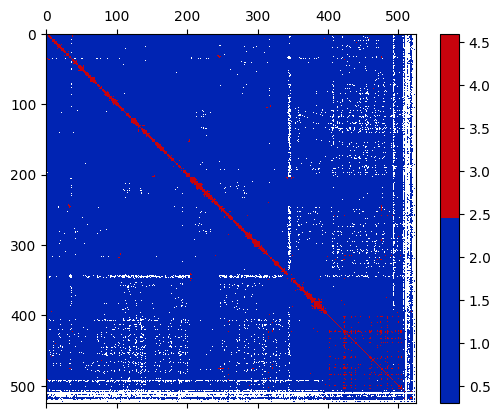

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix), cmap=clr_map)
fig.colorbar(im)
plt.savefig('fig.png', dpi=1000)

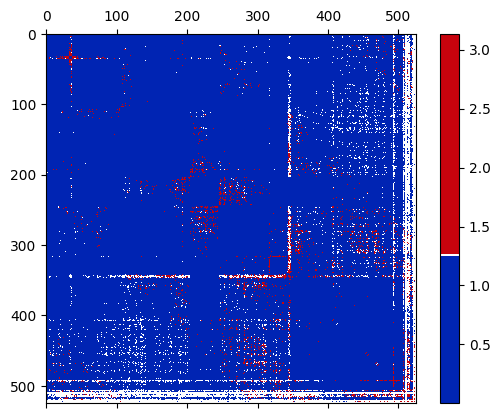

In [15]:
clr_map = MatrixVisualise.get_colormap_diverging(first_quarter=0.399, second_quarter=0.401, mid_position=0.400)
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs), cmap=clr_map)
fig.colorbar(im)
plt.savefig('fig.png', dpi=1000)

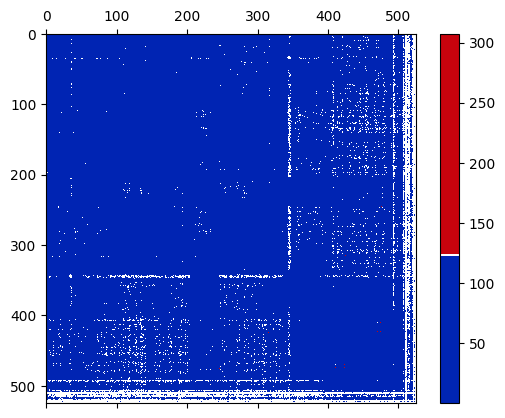

In [16]:
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="obs/exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(matrix_obs, cmap=clr_map)
fig.colorbar(im)

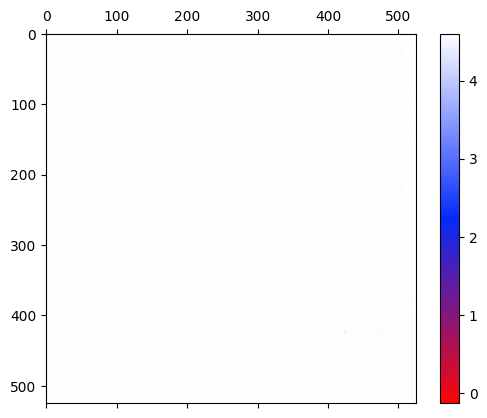

In [9]:
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="exp-obs")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs, addition=np.ceil(-np.nanmin(matrix_obs))), cmap=clr_map)
fig.colorbar(im)

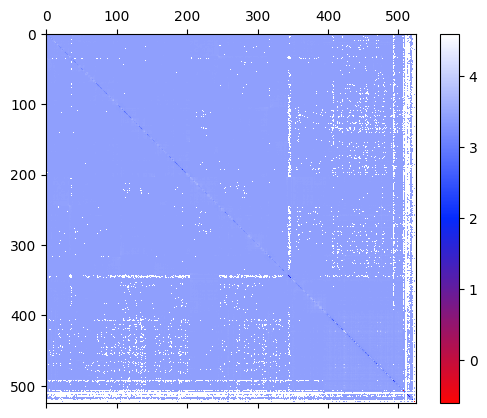

In [10]:
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="obs-exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs, addition=np.ceil(-np.nanmin(matrix_obs))), cmap=clr_map)
fig.colorbar(im)

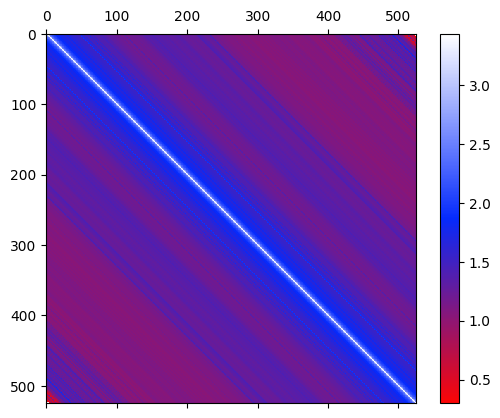

In [11]:
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(MatrixVisualise.log_matrix(matrix_obs), cmap=clr_map)
fig.colorbar(im)

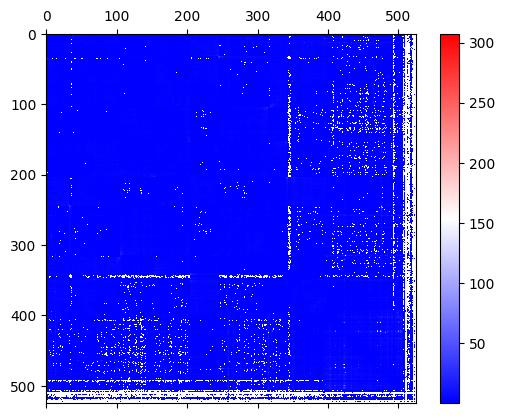

In [12]:
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="obs/exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(matrix_obs, cmap='bwr')
fig.colorbar(im)

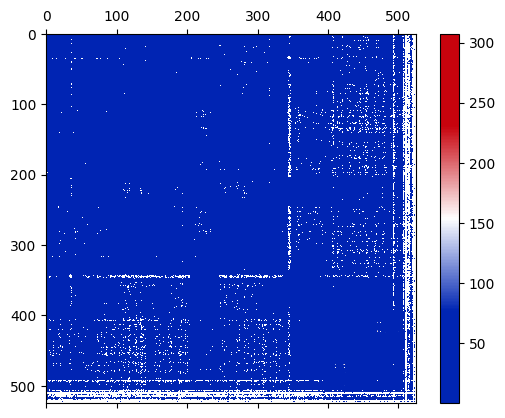

In [7]:
clr_map = MatrixVisualise.get_colormap_diverging()
matrix_obs = MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="obs/exp")
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.matshow(matrix_obs, cmap=clr_map)
fig.colorbar(im)

In [14]:
MatrixVisualise.calculate_diag_means(matrix,scf_desc, scf_desc, res="obs/exp")

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])